<a href="https://colab.research.google.com/github/xDaryamo/BreastCancerPrediction/blob/master/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
from matplotlib import style
import matplotlib.pyplot as plt
from numpy import set_printoptions

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression, mutual_info_classif, chi2
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, plot_confusion_matrix, classification_report

##1.1 Ottenimento del dataset




In [ ]:
#link al file csv
csv = "https://raw.githubusercontent.com/xDaryamo/BreastCancerPrediction/master/dataset.csv"

#Caricamento del csv dalla repo GitHub
df = pd.read_csv(csv)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Informazioni aggiuntive sulle colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Distribuzione dei dati
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#Numeri delle colonne e delle righe del dataset
df.shape

(569, 33)

Notiamo che la colonna target "diagnosis" assume come valori:
M (Maligno) o B (Benigno).

Per semplificare l'analisi dei dati convertiamo i valori in:

*   (M)aligno -> 1
*   (B)enigno -> 0



In [ ]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


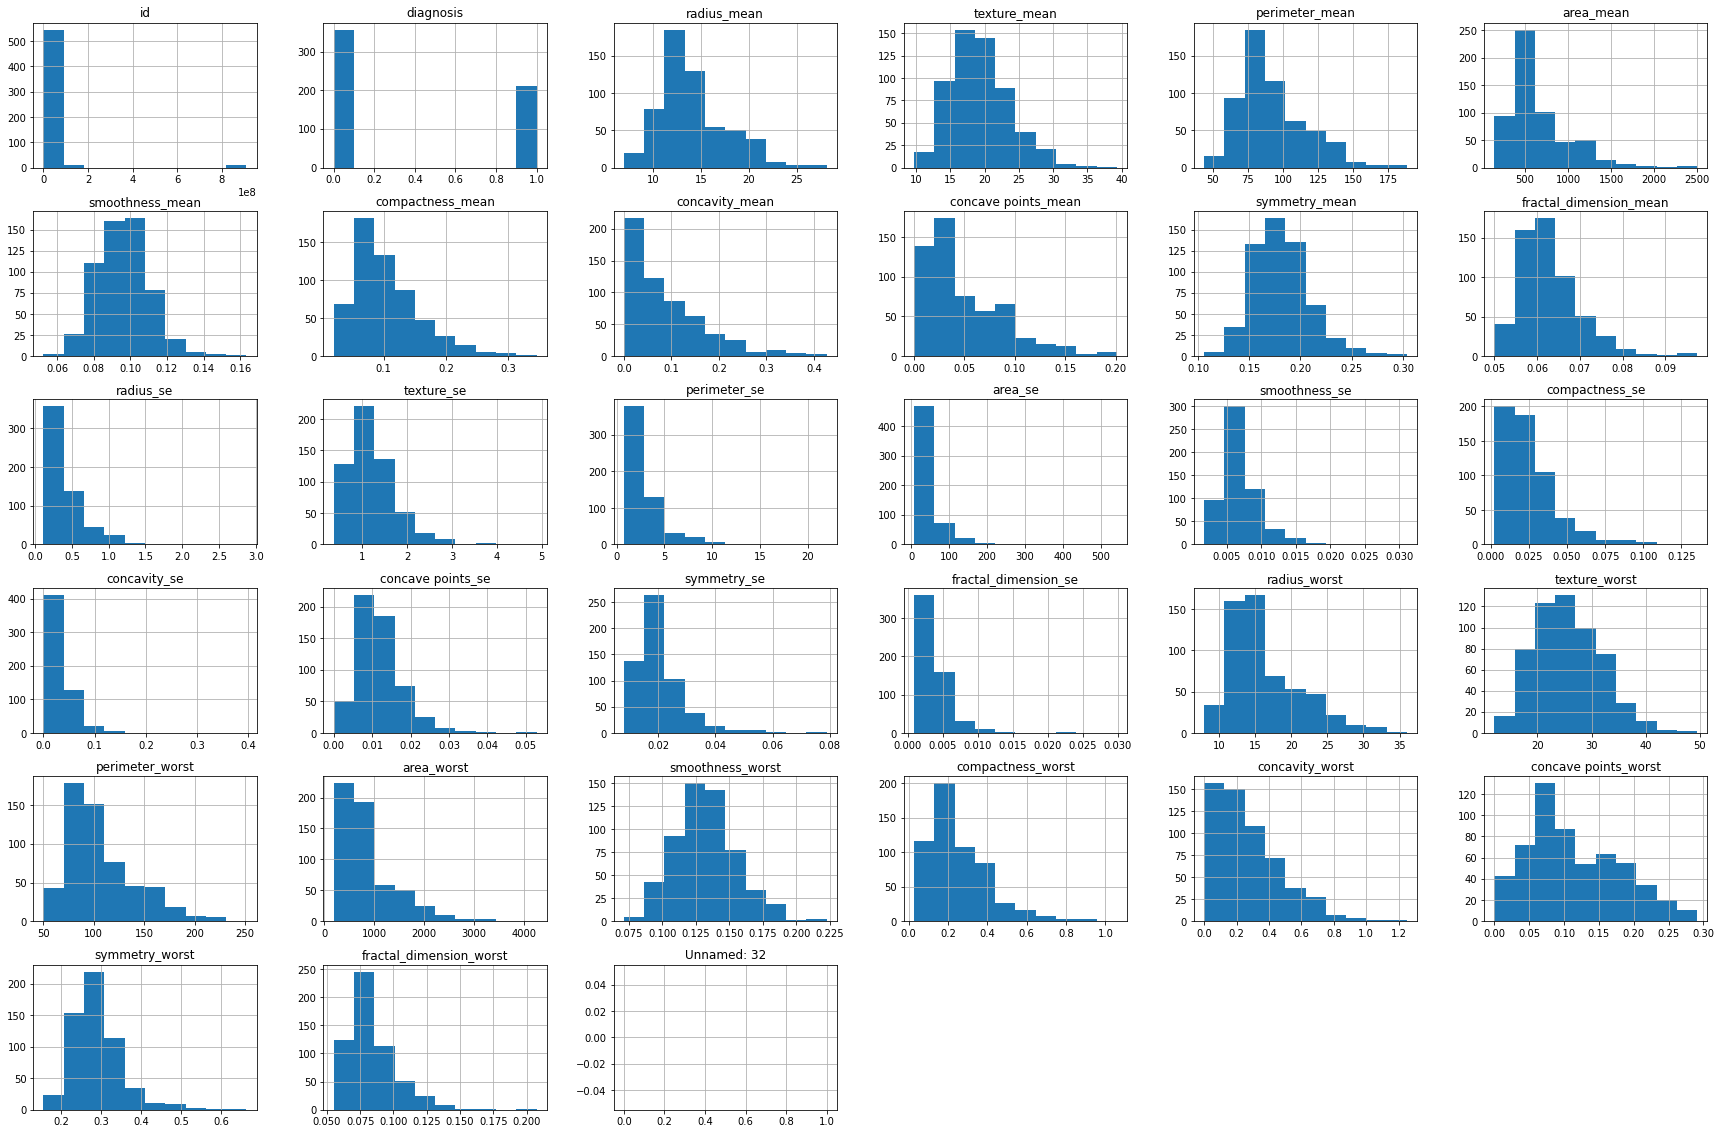

In [ ]:
plt.rcParams['figure.figsize'] = (30,20)

df.hist()
plt.show()

#2. Data Cleaning

##2.1 Controllo valori mancanti

In [ ]:
#Controllo per valori null
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
#Controllo per valori N/A
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

##2.2 Data Imputation

In [ ]:
#La colonna "Unnamed: 32" è completamente vuota, probabilmente si tratta di una colonna erronea del dataset
#Procediamo con la rimozioned della colonna "Unnamed: 32"
df.drop('Unnamed: 32', axis = 1 , inplace = True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#3. Feature Selection

Rimuviamo l'id, in quanto non serve ai fini dell'analisi

In [ ]:
df = df.drop('id', axis = 1)

## 3.1 Eliminazione univariata di feature

Analizziamo la correlazione delle nostre feature con la variabile dipendente attraverso un istogramma

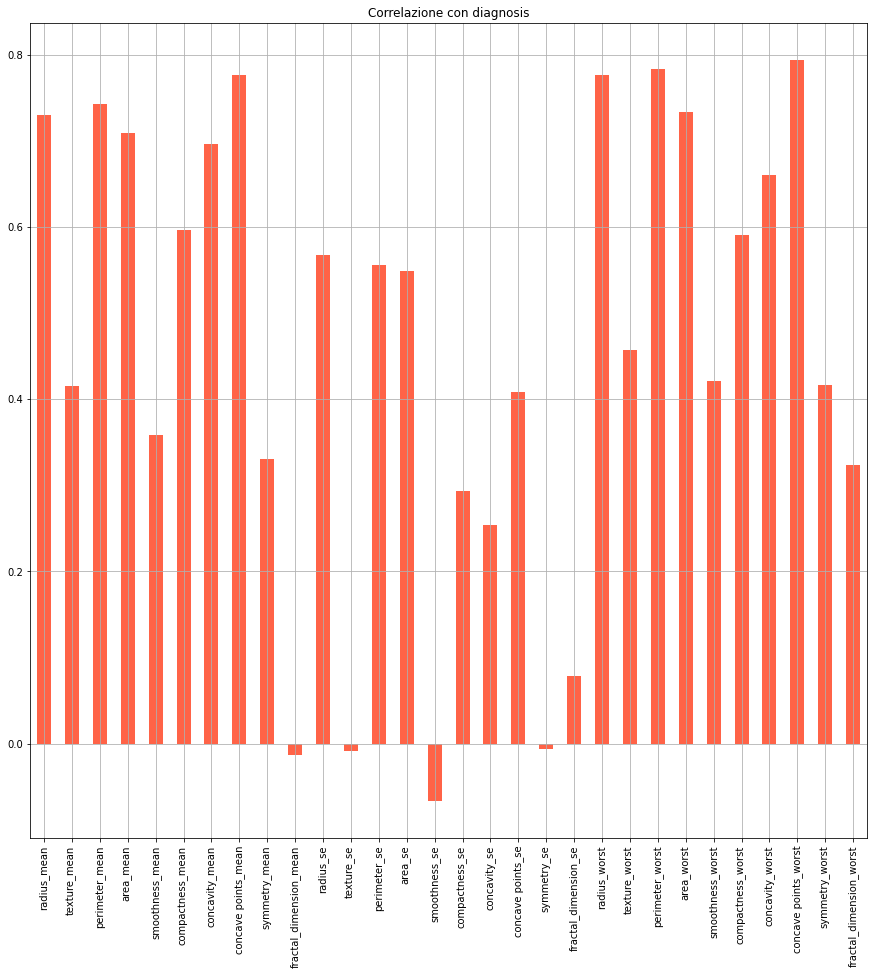

In [ ]:
#Creaiamo un dataframe senza il target
df_without_target = df.drop('diagnosis', axis=1)

#Otteniamo la correlazione a coppie con il target
df_with_correlation = df_without_target.corrwith(df.diagnosis)


#Creiamo un istogramma con la correlazione dei dati con il nostro target (diagnosis)
df_with_correlation.plot(kind='bar', grid=True, figsize=(15, 15), title="Correlazione con diagnosis",color="tomato");

Come mostrato dall'istogramma, ci sono alcune features che sono poco correlate con la nostra variabile dipendente.

Iniziamo a fare una prima selezione delle nostre variabili indipendenti, rimuovendo tutte le features che hanno una correlazione inferiore al 10% con la nostra variabile dipendente

In [ ]:
corr_matrix = df.corr()
threshold = 0.1
filtre = np.abs(corr_matrix["diagnosis"]) <= threshold
to_delete = corr_matrix.columns[filtre].tolist()

print("Feature poco correlate con la variabile dipendente: ", to_delete)

df = df.drop(to_delete, axis = 1)

print("\nFeatures rimaste dopo la selezione:\n")

df.drop('diagnosis', axis = 1).columns.to_list()

Feature poco correlate con la variabile dipendente:  ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']

Features rimaste dopo la selezione:



['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Osserviamo nuovamente l'istogramma

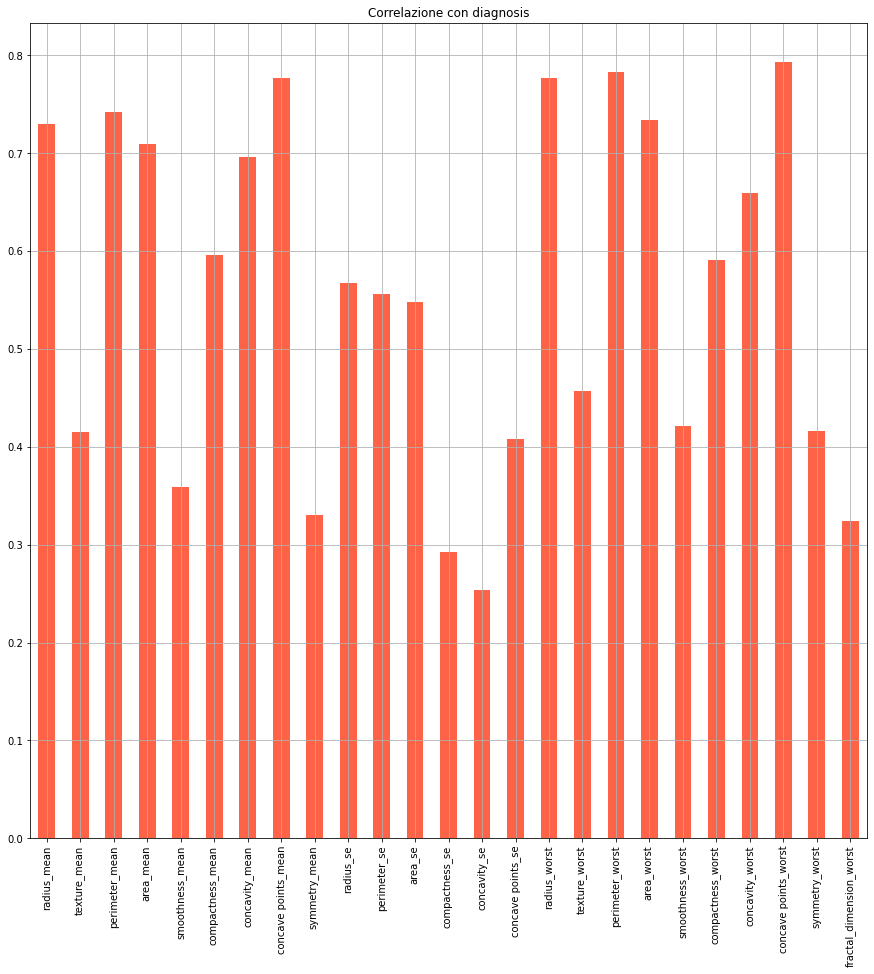

In [ ]:
#Creaiamo un dataframe senza il target
df_without_target = df.drop('diagnosis', axis=1)

#Otteniamo la correlazione a coppie con il target
df_with_correlation = df_without_target.corrwith(df.diagnosis)


#Creiamo un istogramma con la correlazione dei dati con il nostro target (diagnosis)
df_with_correlation.plot(kind='bar', grid=True, figsize=(15, 15), title="Correlazione con diagnosis",color="tomato");

##3.2 Analisi Collinearità

Analizziamo la correlazione tra le nostra variabili attraverso una matrice di correlazione

Text(0.5, 1.0, 'Correlation Map')

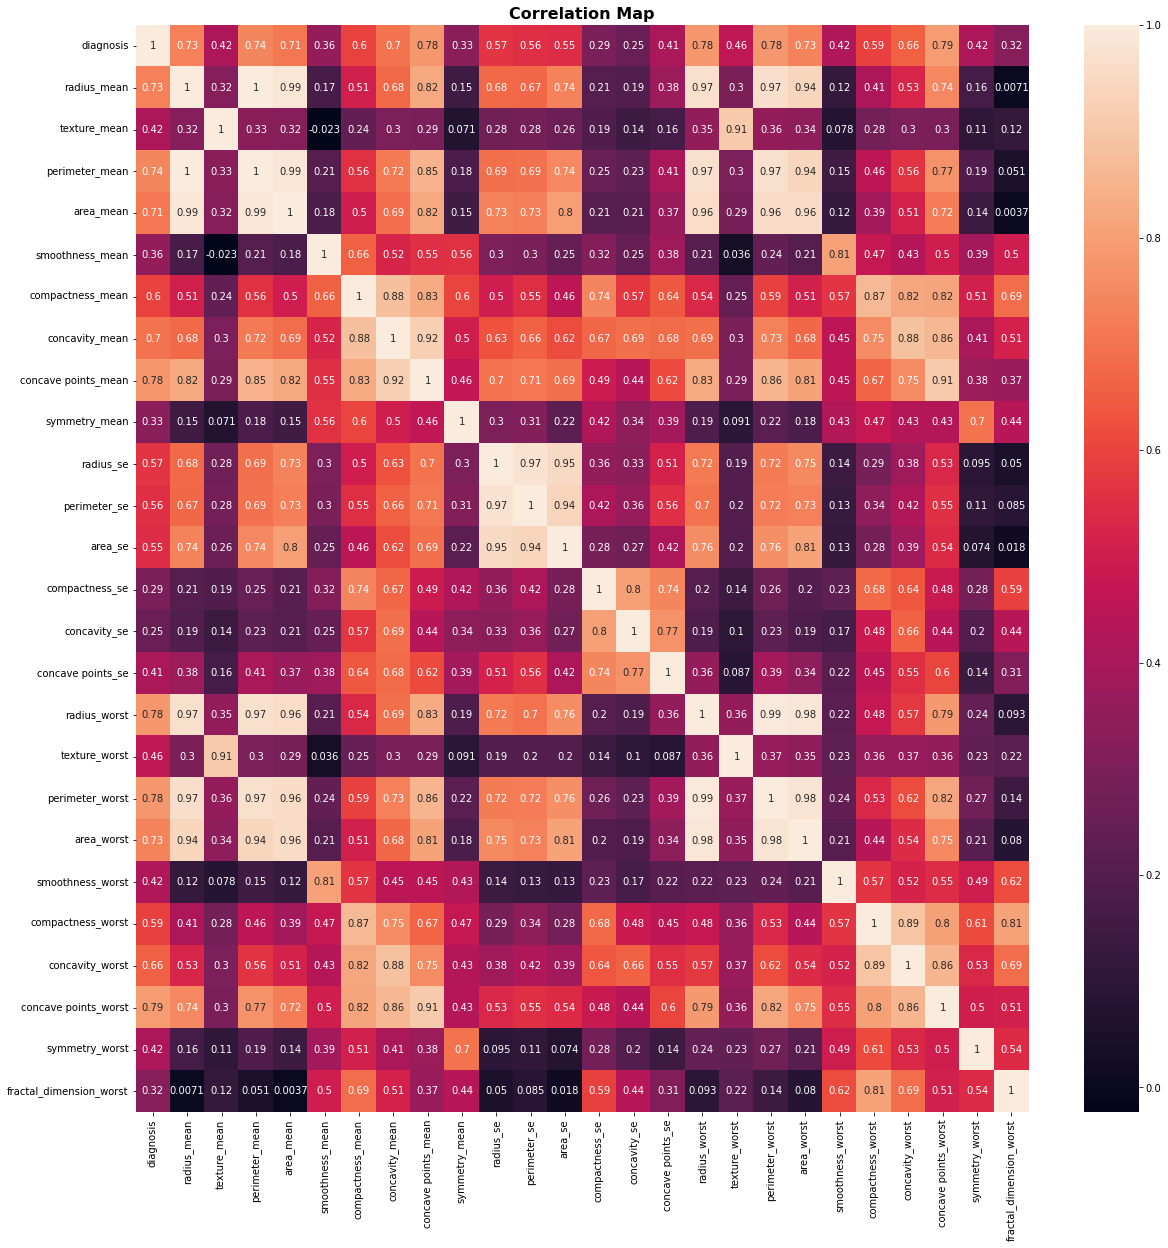

In [ ]:
#Creiamo la heatmap di correlazione
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(), annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

Come possiamo vedere, un grande numero di variabili indipendenti sono altamente correlate tra di loro, causando multicollinearità.

In particolare, isoliamo tutte le variabili indipendenti con una correlazione oltre il 90% (compreso)

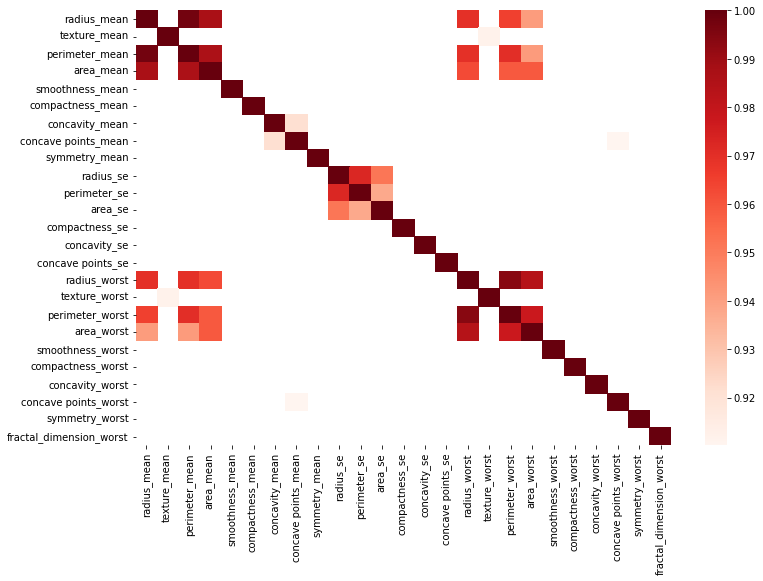

In [ ]:
#df = df.drop(cols, axis=1)

corr = df.drop('diagnosis', axis = 1).corr()

kot = corr[abs(corr) >= 0.9]
plt.figure(figsize=(12,8))
sb.heatmap(kot, cmap="Reds")

Procediamo analizzando ogni coppia di features, e per le coppie con una correlazione superiore al 90%, scartiamo la feature con la correlazione più bassa con la nostra variabile dipendente.

In [ ]:
def remove_collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                if(x[[col.values[0]]].corrwith(x.diagnosis).iloc[0] >= x[[row.values[0]]].corrwith(x.diagnosis).iloc[0]):
                  if row.values[0] not in drop_cols:
                    drop_cols.append(row.values[0])
                else:
                  if col.values[0] not in drop_cols:
                    drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    print('Feature da scartare:')
    print(drop_cols)
    x = x.drop(columns=drops)

    return x

df = remove_collinear_features(df, 0.9)

Feature da scartare:
['radius_mean', 'area_mean', 'concavity_mean', 'perimeter_se', 'area_se', 'perimeter_mean', 'texture_mean', 'radius_worst', 'area_worst', 'concave points_mean']


Dopo aver selezionato le features migliori, analizziamo di nuovo la matrice di correlazione per capire se la collinearità è stata ridotta

Text(0.5, 1.0, 'Correlation Map')

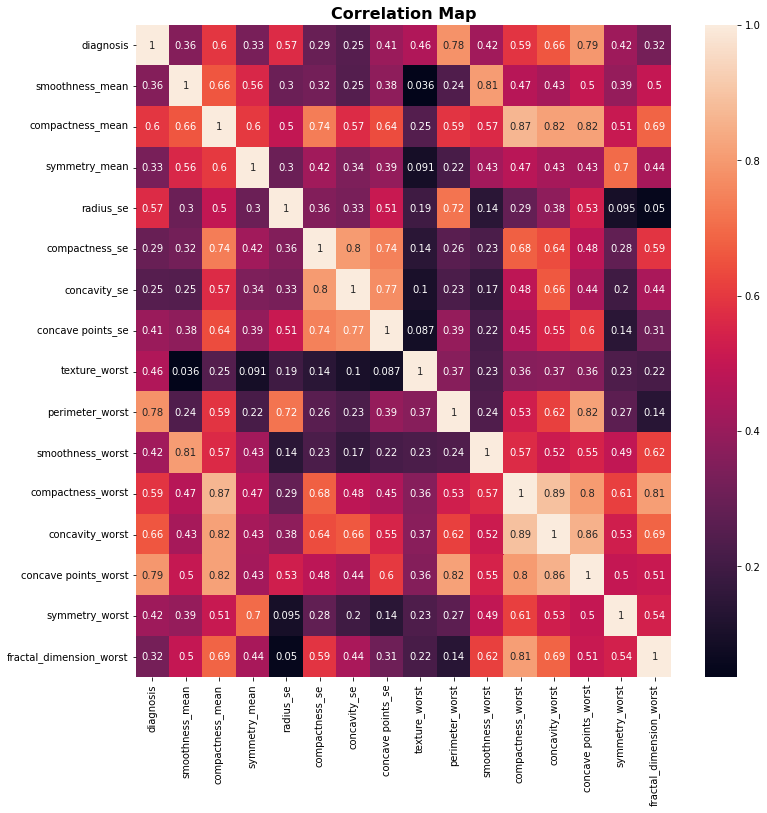

In [ ]:
#Creiamo la heatmap di correlazione
plt.figure(figsize=(12,12))
sb.heatmap(df.corr(), annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

#4. Split Dataset

In [ ]:
#Definizione delle variabili dipendenti e indipendenti

X = df.drop('diagnosis', axis = 1)

y = df['diagnosis']

In [ ]:
#Split del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (455, 15)
y_train dataset:  (455,)
X_test dataset:  (114, 15)
y_test dataset:  (114,)


0    357
1    212
Name: diagnosis, dtype: int64

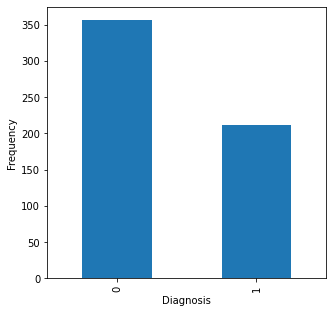

In [ ]:
#Distribuzione della variabile dipendente
plt.figure(figsize=(5,5))
pd.value_counts(df['diagnosis']).plot.bar()
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
df['diagnosis'].value_counts()

#5. Data Scaling

In [ ]:
#Normalizzazione
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#Feature selection supervisionata
#fs = SelectKBest(score_func=r_regression,k=26)
#fs.fit_transform(X_train, y_train)

#X_train = fs.transform(X_train)
#X_test = fs.transform(X_test)
#print(X_train.shape)


#X.columns[fs.get_support(indices=True)]

#X.columns[fs.get_support(indices=True)].tolist()

#6. Costruzione dei modelli

In [ ]:
lr = []
nb = []
dt = []
rf = []

##6.1 Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


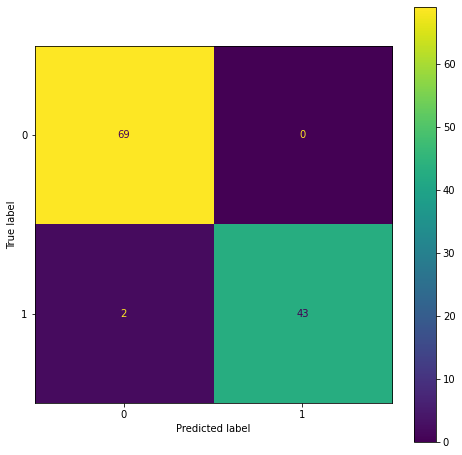

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.96      0.98        45

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9555555555555556
[0.982, 1.0, 0.956]


In [ ]:
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred = logisticRegr.predict(X_test)

labels = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(logisticRegr, X_test, y_test, ax=ax)  

plt.show()

print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

lr.append(round(accuracy_score(y_test, y_pred), 3))
lr.append(round(precision_score(y_test, y_pred), 3))
lr.append(round(recall_score(y_test, y_pred), 3))

print(lr)


##6.2 Naive-Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


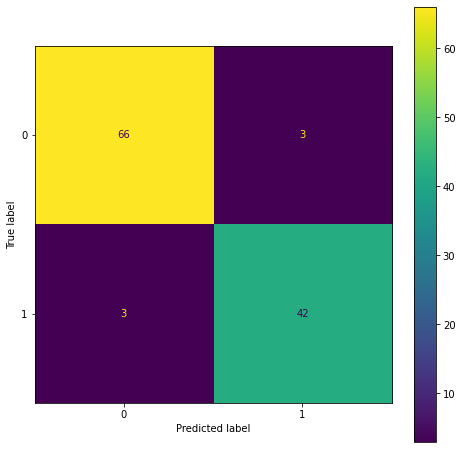

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        69
           1       0.93      0.93      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315
Precision: 0.9333333333333333
Recall: 0.9333333333333333


In [ ]:
NB = GaussianNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

labels = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(NB, X_test, y_test, ax=ax)  

plt.show()

print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

nb.append(round(accuracy_score(y_test, y_pred), 3))
nb.append(round(precision_score(y_test, y_pred), 3))
nb.append(round(recall_score(y_test, y_pred), 3))


##6.3 Decision Tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


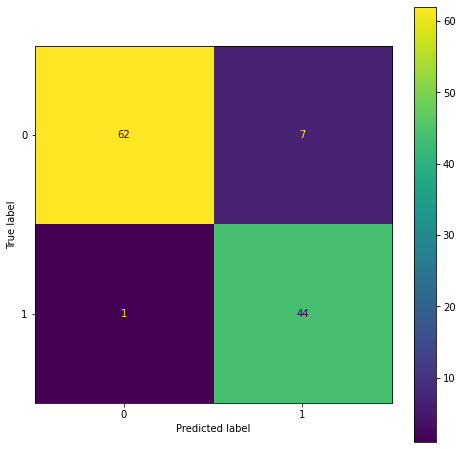

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        69
           1       0.86      0.98      0.92        45

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114

Accuracy: 0.9298245614035088
Precision: 0.8627450980392157
Recall: 0.9777777777777777


In [ ]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)

labels = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(DecisionTree, X_test, y_test, ax=ax)  

plt.show()

print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


dt.append(round(accuracy_score(y_test, y_pred), 3))
dt.append(round(precision_score(y_test, y_pred), 3))
dt.append(round(recall_score(y_test, y_pred), 3))

##6.4 Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


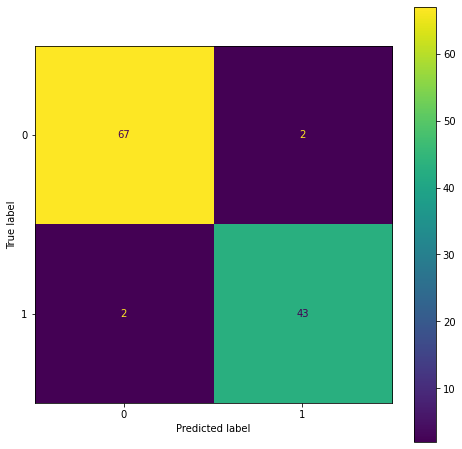

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.96      0.96      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9649122807017544
Precision: 0.9555555555555556
Recall: 0.9555555555555556


In [ ]:
RandomForest = RandomForestClassifier()

RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

labels = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(RandomForest, X_test, y_test, ax=ax)  

plt.show()

print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

rf.append(round(accuracy_score(y_test, y_pred), 3))
rf.append(round(precision_score(y_test, y_pred),3))
rf.append(round(recall_score(y_test, y_pred), 3))


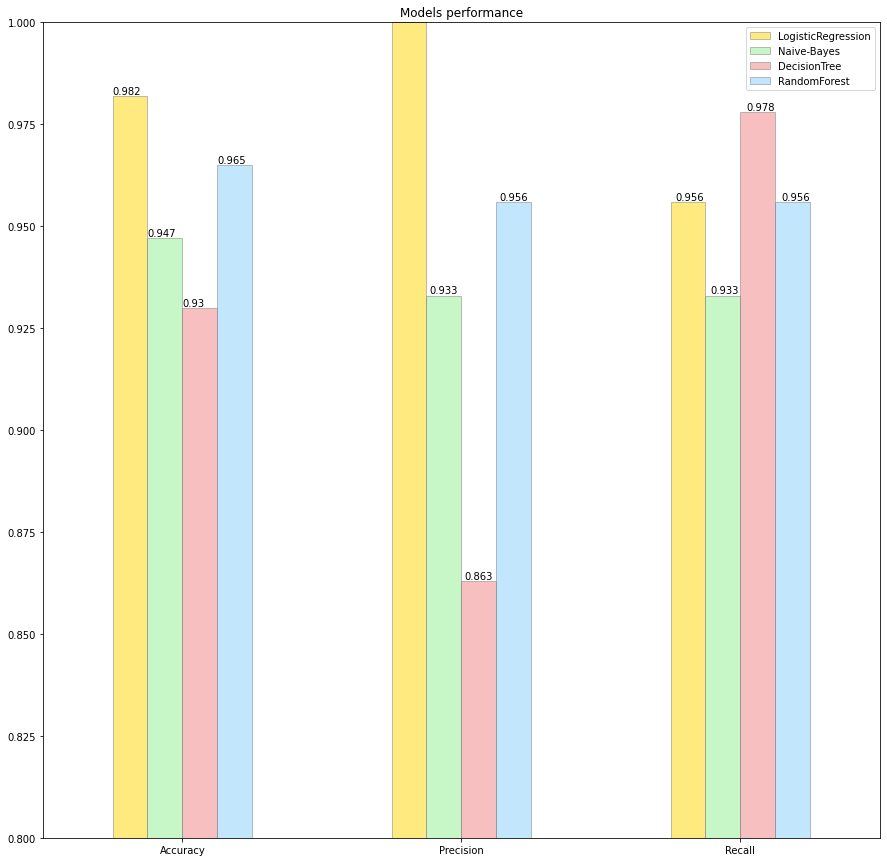

In [ ]:
models_metrics = {'LogisticRegression': lr, 
                 'Naive-Bayes': nb,
                 'DecisionTree' : dt,
                 'RandomForest' : rf
                }

metrics = pd.DataFrame(data = models_metrics)
metrics.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = metrics.plot(kind='bar', figsize = (15,15), ylim = (0.80, 1), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue'],
        rot = 0, title ='Models performance',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()